# COGS 209: Youth Mental Health

In [2]:
# Import libraries
import pandas as pd
import requests
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [3]:
# Read in files
df = pd.read_csv('data/YRBS_2023.csv')
df.head()

/var/folders/jf/tn4cnxdn127dtc8x_7vb71000000gn/T/ipykernel_62490/4240641621.py:2: DtypeWarning: Columns (248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/YRBS_2023.csv')


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,QNILLICT,QNOBESE,QNOWT,WEIGHT,STRATUM,PSU,BMIPCT,RACEETH,Q6ORIG,Q7ORIG
0,3.0,1.0,1.0,NaN,C,1.65 81.6544111131112212212212211211121111,81.6544111131112212212212211211121111111111111...,4.0,4.0,1.0,...,NaN,1.0,2.0,0.8614103 1629497.08 505180,103,16294,97.08 505180,NaN,505,180
1,4.0,2.0,1.0,2.0,E,51111111222212231222211211121111,5111111122221223122221121112111111111111111111...,5.0,1.0,1.0,...,2.0,NaN,NaN,0.8920103 16294 . 5N N233,103,16294,. 5N N233,5.0,N N,233
2,5.0,2.0,3.0,2.0,E,1.68 74.8453231111112212212212211151112211,74.8453231111112212212212211151112211361111111...,5.0,3.0,2.0,...,1.0,2.0,1.0,0.5081103 1629492.26 5506165,103,16294,92.26 5506165,5.0,506,165
3,6.0,1.0,2.0,2.0,E,41281131112112212212211211117811,4128113111211221221221121111781135212845211211...,4.0,1.0,2.0,...,1.0,NaN,NaN,1.1759103 16294 . 5N N105,103,16294,. 5N N105,5.0,N N,105
4,3.0,2.0,1.0,2.0,E,1.85 56.7051111111312212112212111151111131,56.7051111111312212112212111151111131352122111...,5.0,1.0,1.0,...,2.0,2.0,2.0,0.8920103 16294 7.57 5601125,103,16294,7.57 5601125,5.0,601,125


## Data Cleaning
Not much data cleaning is needed for this data, other than to remove irrelevant columns!

In [46]:
df_cleaned = df.filter(items = ['Q84', 'Q26', 'Q27', 'Q28', 'Q29', 'Q80', 'Q76', 'Q25', 'Q2','Q1', 'Q86', 'RACEETH'])
df_cleaned.head()

,Q84,Q26,Q27,Q28,Q29,Q80,Q76,Q25,Q2,Q1,Q86,RACEETH
0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,3.0,1.0,NaN
1,3.0,2.0,2.0,2.0,1.0,4.0,5.0,2.0,2.0,4.0,1.0,5.0
2,2.0,1.0,2.0,2.0,1.0,8.0,8.0,2.0,2.0,5.0,1.0,5.0
3,3.0,1.0,2.0,2.0,1.0,8.0,3.0,2.0,1.0,6.0,1.0,5.0
4,3.0,1.0,2.0,1.0,1.0,6.0,8.0,2.0,2.0,3.0,1.0,5.0


## Exploratory Data Analysis (EDA)

In [48]:
# Shape of dataset
df_cleaned.shape

(20103, 12)

In [47]:
# Counting null values in each columns
df_cleaned.isnull().sum()

Q84        4398
Q26         240
Q27         436
Q28        1737
Q29         767
Q80        4900
Q76        1227
Q25         205
Q2          158
Q1           98
Q86        5562
RACEETH     370
dtype: int64

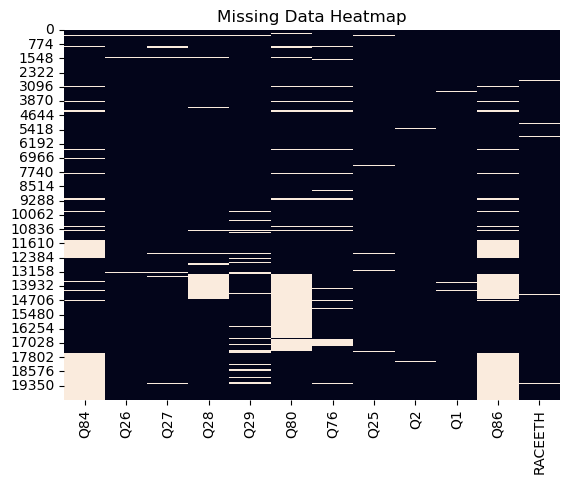

In [74]:
# Visualizing missing data
sns.heatmap(df_cleaned.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [50]:
# Summary statistics for dataframe
df_cleaned.describe()

,Q84,Q26,Q27,Q28,Q29,Q80,Q76,Q25,Q2,Q1,Q86,RACEETH
count,15705.000000,19863.000000,19667.000000,18366.000000,19336.000000,15203.000000,18876.000000,19898.000000,19945.000000,20005.000000,14541.000000,19733.000000
mean,2.825215,1.591804,1.785732,1.825112,1.170304,6.048675,4.978332,1.827973,1.504437,4.892677,1.146001,5.010845
std,1.217580,0.491512,0.410324,0.379882,0.578209,1.981993,2.503022,0.377414,0.499993,1.218455,0.803579,1.832258
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,1.000000,6.000000,3.000000,2.000000,1.000000,4.000000,1.000000,5.000000
50%,3.000000,2.000000,2.000000,2.000000,1.000000,6.000000,5.000000,2.000000,2.000000,5.000000,1.000000,5.000000
75%,4.000000,2.000000,2.000000,2.000000,1.000000,8.000000,8.000000,2.000000,2.000000,6.000000,1.000000,6.000000
max,5.000000,2.000000,2.000000,2.000000,5.000000,8.000000,8.000000,2.000000,2.000000,7.000000,7.000000,8.000000


### Demographic Info

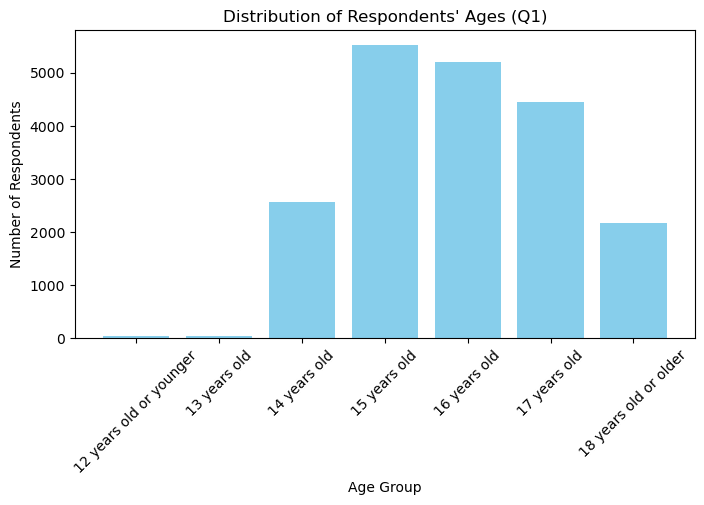

In [38]:
# Creating key for age groups
age_counts = df_cleaned['Q1'].value_counts().sort_index()

age_key = {
    1.0: '12 years old or younger',
    2.0: '13 years old',
    3.0: '14 years old',
    4.0: '15 years old',
    5.0: '16 years old',
    6.0: '17 years old',
    7.0: '18 years old or older'
}

age_counts.index = age_counts.index.map(age_key)

# Display distribution of ages
plt.figure(figsize=(8,4))
ages = plt.bar(age_counts.index, age_counts, color = 'skyblue')
plt.title("Distribution of Respondents' Ages (Q1)")
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

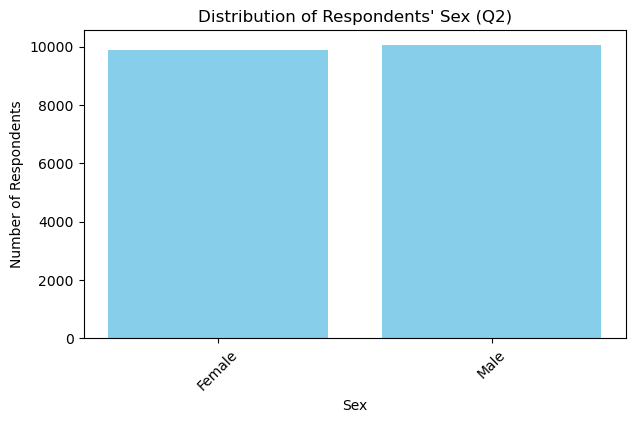

In [45]:
# Creating key for sex
sex_counts = df_cleaned['Q2'].value_counts().sort_index()

sex_key = {
    1.0: 'Female',
    2.0: 'Male'
}

sex_counts.index = sex_counts.index.map(sex_key)

# Display distribution of sex
plt.figure(figsize=(7,4))
ages = plt.bar(sex_counts.index, sex_counts, color = 'skyblue')
plt.title("Distribution of Respondents' Sex (Q2)")
plt.xlabel('Sex')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

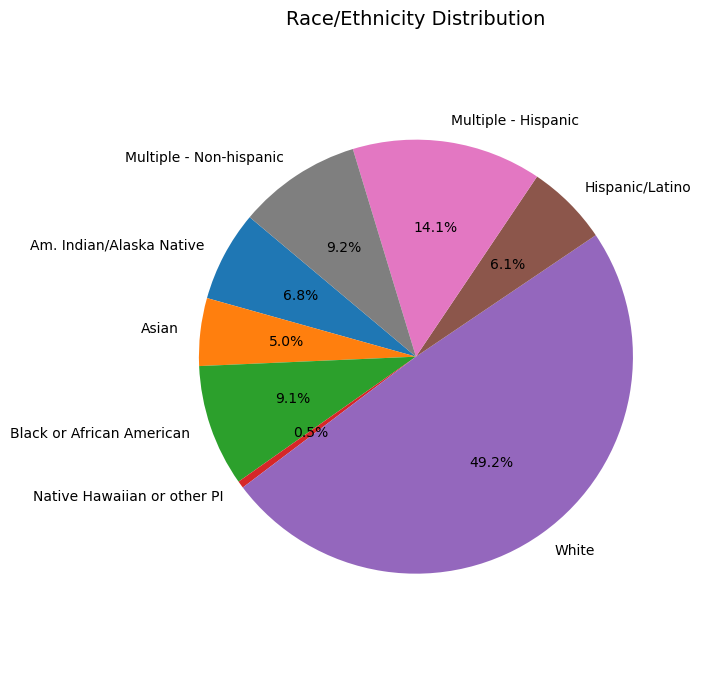

In [72]:
# Looking at race
race_counts = df_cleaned['RACEETH'].value_counts().sort_index()

race_key = {
    1.0: 'Am. Indian/Alaska Native',
    2.0: 'Asian',
    3.0: 'Black or African American',
    4.0: 'Native Hawaiian or other PI',
    5.0: 'White',
    6.0: 'Hispanic/Latino',
    7.0: 'Multiple - Hispanic',
    8.0: 'Multiple - Non-hispanic'
}

race_counts.index = race_counts.index.map(race_key)

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    race_counts.values,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title("Race/Ethnicity Distribution", fontsize=14)
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.show()

### Factors of Interest

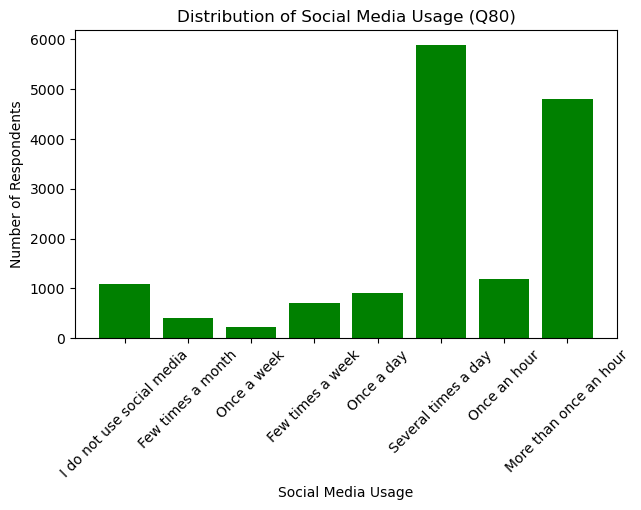

In [61]:
# Creating key for social media usage
sm_counts = df_cleaned['Q80'].value_counts().sort_index()

sm_key = {
    1.0: 'I do not use social media',
    2.0: 'Few times a month',
    3.0: 'Once a week',
    4.0: 'Few times a week',
    5.0: 'Once a day',
    6.0: 'Several times a day',
    7.0: 'Once an hour',
    8.0: 'More than once an hour'
}

sm_counts.index = sm_counts.index.map(sm_key)

# Display distribution of social media usage
plt.figure(figsize=(7,4))
ages = plt.bar(sm_counts.index, sm_counts, color = 'green')
plt.title("Distribution of Social Media Usage (Q80)")
plt.xlabel('Social Media Usage')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

In [104]:
# Frequency of being electronically bullied over the past 12 months
bullied_counts = df_cleaned['Q25'].value_counts().sort_index()

bullied_key = {
    1.0: 'Yes',
    2.0: 'No'
}

bullied_counts.index = bullied_counts.index.map(bullied_key)
bullied_counts

Q25
Yes     3423
No     16475
Name: count, dtype: int64

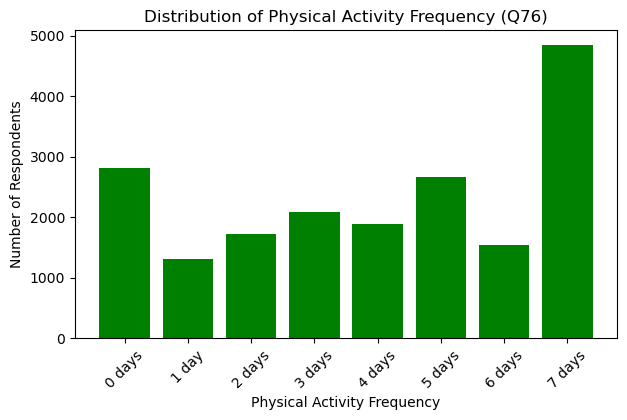

In [105]:
# Frequency of days in a week where respondent was physically active for >60 minutes that day
# Creating key for phys. activity
pa_counts = df_cleaned['Q76'].value_counts().sort_index()

pa_key = {
    1.0: '0 days',
    2.0: '1 day',
    3.0: '2 days',
    4.0: '3 days',
    5.0: '4 days',
    6.0: '5 days',
    7.0: '6 days',
    8.0: '7 days'
}

pa_counts.index = pa_counts.index.map(pa_key)

# Display distribution of phys. activity
plt.figure(figsize=(7,4))
ages = plt.bar(pa_counts.index, pa_counts, color = 'green')
plt.title("Distribution of Physical Activity Frequency (Q76)")
plt.xlabel('Physical Activity Frequency')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

### Measures of Mental Health

In [54]:
# Q84: During the last 30 days, how often was your mental health not good?
df_cleaned['Q84'].mean()

2.825214899713467

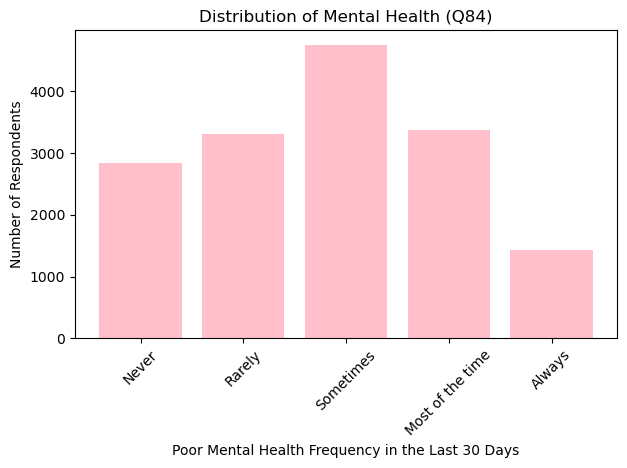

In [62]:
# Distribution of Q84
# Creating key for mental health
mh_counts = df['Q84'].value_counts().sort_index()

mh_key = {
    1.0: 'Never',
    2.0: 'Rarely',
    3.0: 'Sometimes',
    4.0: 'Most of the time',
    5.0: 'Always'
}

mh_counts.index = mh_counts.index.map(mh_key)

# Display distribution of mental health
plt.figure(figsize=(7,4))
ages = plt.bar(mh_counts.index, mh_counts, color = 'pink')
plt.title("Distribution of Mental Health (Q84)")
plt.xlabel('Poor Mental Health Frequency in the Last 30 Days')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

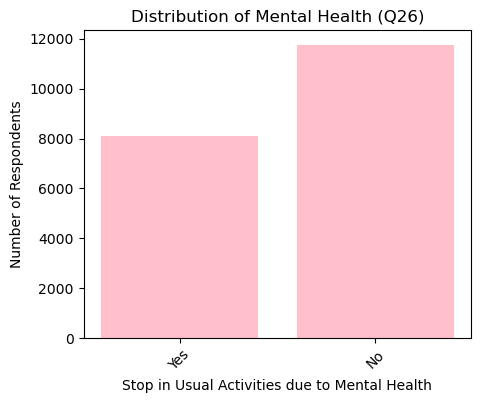

In [97]:
# Q26: During the past 12 months, did you ever feel sad or hopeless almost everyday for two weeks or more in a row...
#... that you stopped doing some usual activities?

# Distribution of Q26
# Creating key for hopeless feelings/stop activities
mh2_counts = df['Q26'].value_counts().sort_index()

mh2_key = {
    1.0: 'Yes',
    2.0: 'No'
}

mh2_counts.index = mh2_counts.index.map(mh2_key)

# Display distribution of hopeless feelings/stop activities
plt.figure(figsize=(5,4))
ages = plt.bar(mh2_counts.index, mh2_counts, color = 'pink')
plt.title("Distribution of Mental Health (Q26)")
plt.xlabel('Stop in Usual Activities due to Mental Health')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

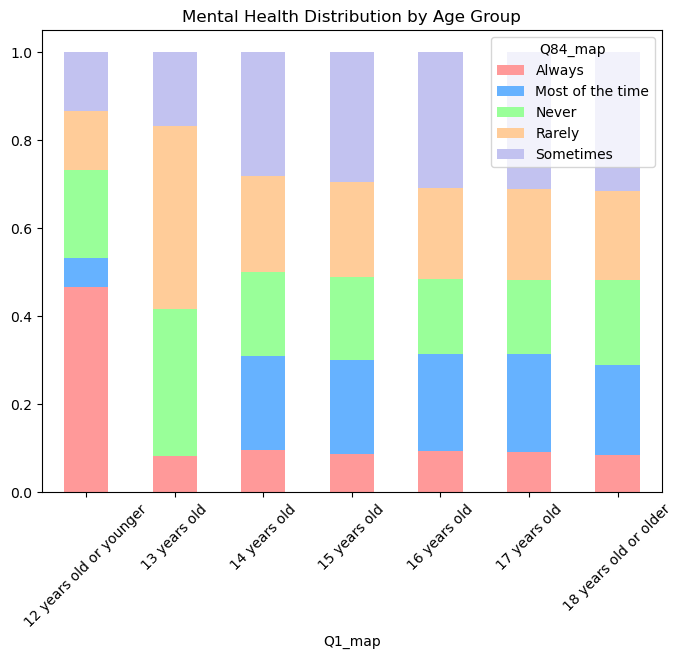

In [100]:
# Looking at mental health distribution by age group
df_cleaned['Q1_map'] = df_cleaned['Q1'].map(age_key)
df_cleaned['Q84_map'] = df_cleaned['Q84'].map(mh_key)

df_cleaned.groupby('Q1_map')['Q84_map'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(8, 6), color = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#FF6666'])
plt.title('Mental Health Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()